# Setup

In [1]:
include(joinpath("..","src","setup.jl"))
using SampledSignals
SampledSignals.embed_javascript()

┌ Info: Recompiling stale cache file /Users/davidlittle/.julia/compiled/v0.7/Unitful/5WYj5.ji for Unitful [1986cc42-f94f-5a68-af5c-568840ba703d]
└ @ Base loading.jl:1185
┌ Info: Recompiling stale cache file /Users/davidlittle/.julia/compiled/v0.7/AuditoryBistabilityLE/RqG8S.ji for AuditoryBistabilityLE [7e25a372-ade5-11e8-17af-a30e5a9e2c28]
└ @ Base loading.jl:1185


┌ Warning: RCall.jl: Want to understand how all the pieces fit together? See the R for Data
│ Science book: http://r4ds.had.co.nz/
└ @ RCall /Users/davidlittle/.julia/packages/RCall/Q4n8R/src/io.jl:110


# context stimuli

Auditory Spectrogram: 100%|█████████████████████████████| Time: 0:00:01


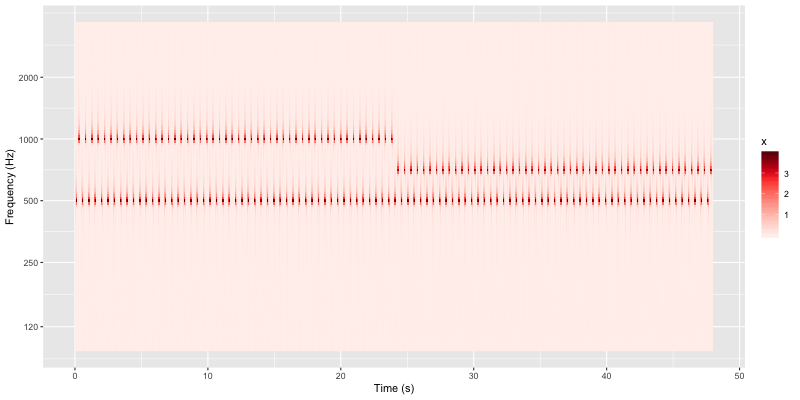

RObject{VecSxp}


In [14]:
import AuditoryBistabilityLE: tone, silence, normpower, dB, amplify
scene12 = [ab(120ms,120ms,1,50,500Hz,12); ab(120ms,120ms,1,50,500Hz,6)] |> normpower |> amplify(-10dB)
rplot(audiospect(scene12))

Auditory Spectrogram: 100%|█████████████████████████████| Time: 0:00:01


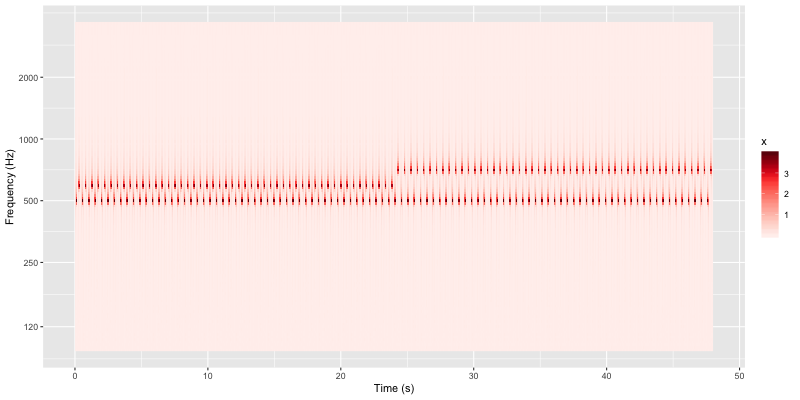

RObject{VecSxp}


In [15]:
scene05 = [ab(120ms,120ms,1,50,500Hz,3); ab(120ms,120ms,1,50,500Hz,6)] |> normpower |> amplify(-10dB)
rplot(audiospect(scene05))

In [16]:
paramfile = joinpath("..","data","count_lengths","run_2018-10-04",
                     "individual_levels_params.feather")
params = getparams(paramfile) do i,row
  abs(row[:t_c_m] - 100) < 1 &&
  abs(row[:t_c_a] - 5) < 1 &&
  row[:Δf] == 12
end

settings = TOML.parsefile(joinpath(srcdir,"settings.toml"))

Dict{AbstractString,Any} with 9 entries:
  "percept_lengths" => Dict{AbstractString,Any}("threshold"=>0.45,"min_length_m…
  "freqs"           => Dict{AbstractString,Any}("bistable"=>Dict{AbstractString…
  "mask"            => Dict{AbstractString,Any}("window_ms"=>500,"delta_ms"=>25…
  "rates"           => Dict{AbstractString,Any}("rates_Hz"=>[2, 4, 8, 16, 32],"…
  "config"          => Dict{AbstractString,Any}()
  "scales"          => Dict{AbstractString,Any}("bistable"=>Dict{AbstractString…
  "track"           => Dict{AbstractString,Any}("bistable"=>Dict{AbstractString…
  "nmf"             => Dict{AbstractString,Any}("skipframes"=>0,"tol"=>0.001,"w…
  "bandwidth_ratio" => Dict{AbstractString,Any}("window_ms"=>500,"threshold"=>1…

In [27]:
result = bistable_model(scene12,params,settings,intermediate_results=true,progressbar=true);

Auditory Spectrogram: 100%|█████████████████████████████| Time: 0:00:01
Cortical Model: 100%|███████████████████████████████████| Time: 0:00:00
Cortical Model: 100%|███████████████████████████████████| Time: 0:00:00
Cortical Model: 100%|███████████████████████████████████| Time: 0:00:00
Temporal Coherence Analysis: 100%|██████████████████████| Time: 0:00:01
┌ Info: 0.62% of frames failed to fully converge to a solution.
└ @ AuditoryBistabilityLE /Users/davidlittle/.julia/packages/AuditoryBistabilityLE/p8Ufl/src/nmf.jl:44
Source Tracking (multi-prior): 100%|████████████████████| Time: 0:00:02


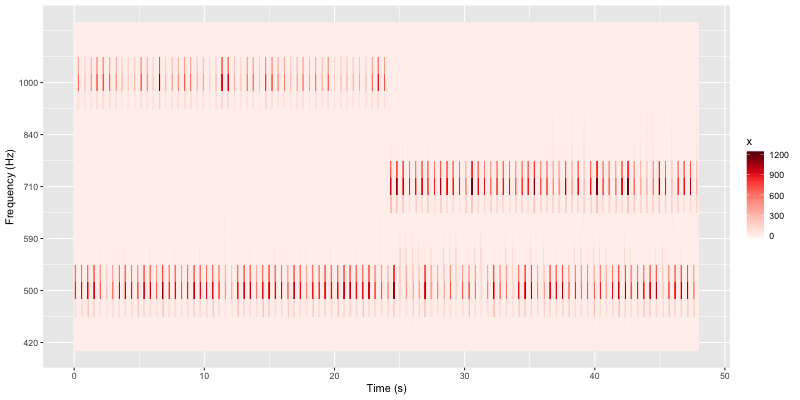

RObject{VecSxp}


In [28]:
rplot(result.primary_source)

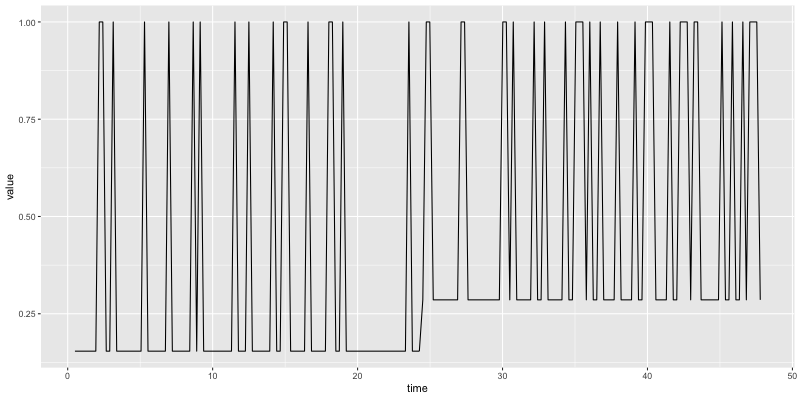

RObject{VecSxp}


In [29]:
rplot(result.percepts.ratio)

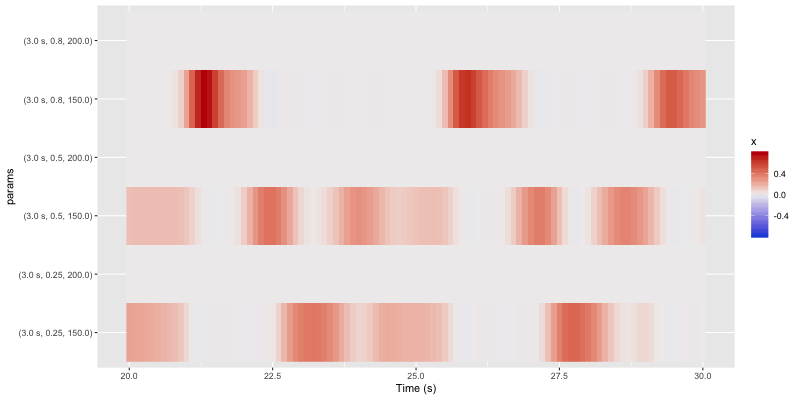

RObject{VecSxp}


In [31]:
rplot(result.sources.outweights[20s .. 30s])

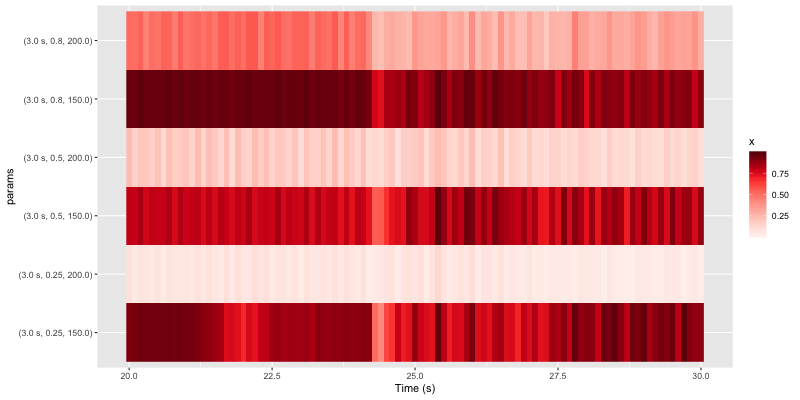

RObject{VecSxp}


In [32]:
rplot(result.sources.inweights[20s .. 30s])

I don't understnad why this is leading to 12st fusion... why would it be different?

In [22]:
result = bistable_model(scene05,params,settings,intermediate_results=true,progressbar=true);

Auditory Spectrogram: 100%|█████████████████████████████| Time: 0:00:01
Cortical Model: 100%|███████████████████████████████████| Time: 0:00:00
Cortical Model: 100%|███████████████████████████████████| Time: 0:00:00
Cortical Model: 100%|███████████████████████████████████| Time: 0:00:00
Temporal Coherence Analysis: 100%|██████████████████████| Time: 0:00:01
┌ Info: 0.21% of frames failed to fully converge to a solution.
└ @ AuditoryBistabilityLE /Users/davidlittle/.julia/packages/AuditoryBistabilityLE/p8Ufl/src/nmf.jl:44
Source Tracking (multi-prior): 100%|████████████████████| Time: 0:00:02


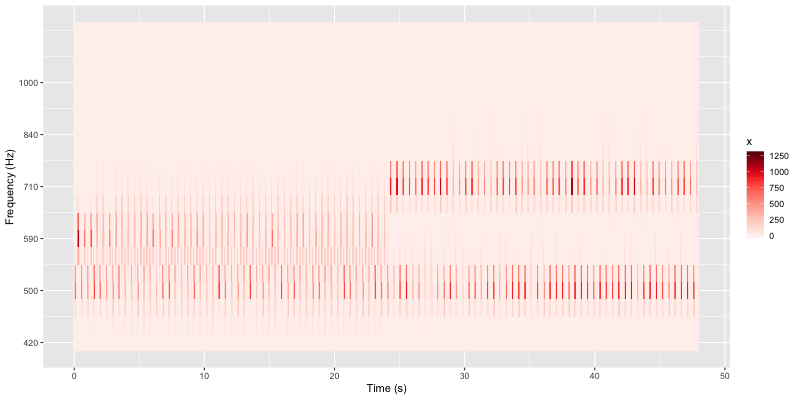

RObject{VecSxp}


In [23]:
rplot(result.primary_source)

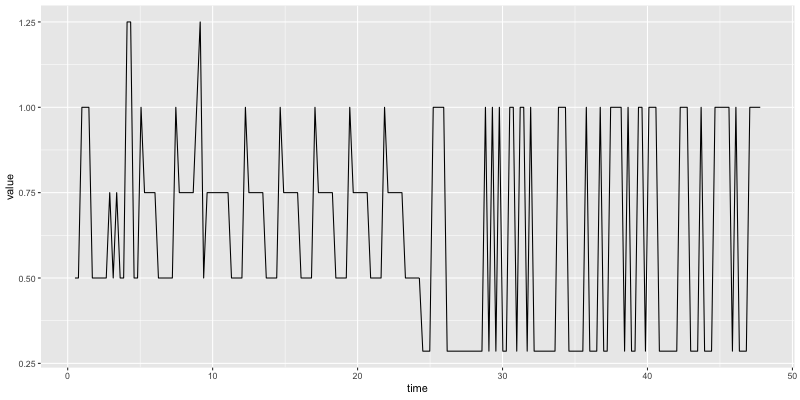

RObject{VecSxp}


In [25]:
rplot(result.percepts.ratio)

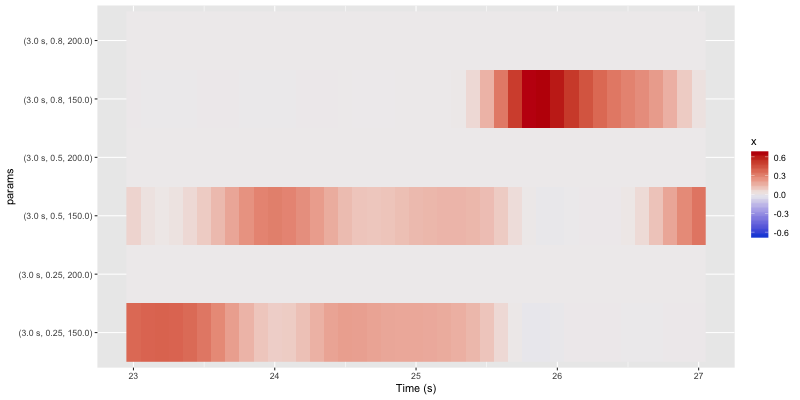

RObject{VecSxp}


In [35]:
rplot(result.sources.outweights[23s .. 27s])

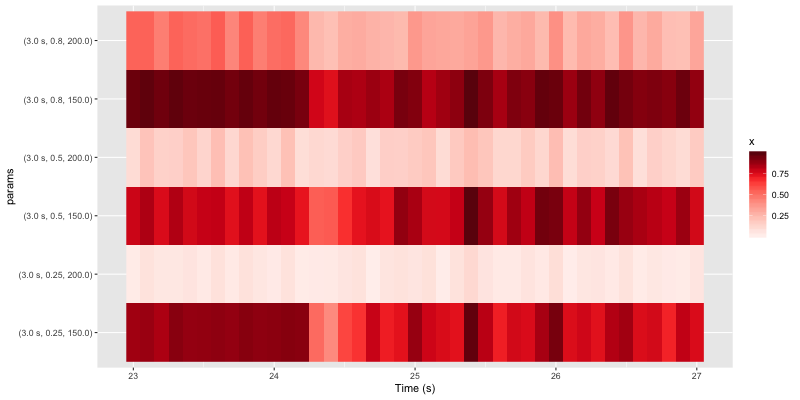

RObject{VecSxp}


In [34]:
rplot(result.sources.inweights[23s .. 27s])